Authored by: Diaa Abuhani

**(3) Geometery Measures** <br>

Geometery measures offer indirect characterizations of class separability. The shape, position, and interconnectedness of these manifolds give hints on how well classes are separated, but they do not describe separability by design.The following sections analyze different known geometery measures.



**3.1 Nonlineality of linear classifier by linear programming (noted as L3)**

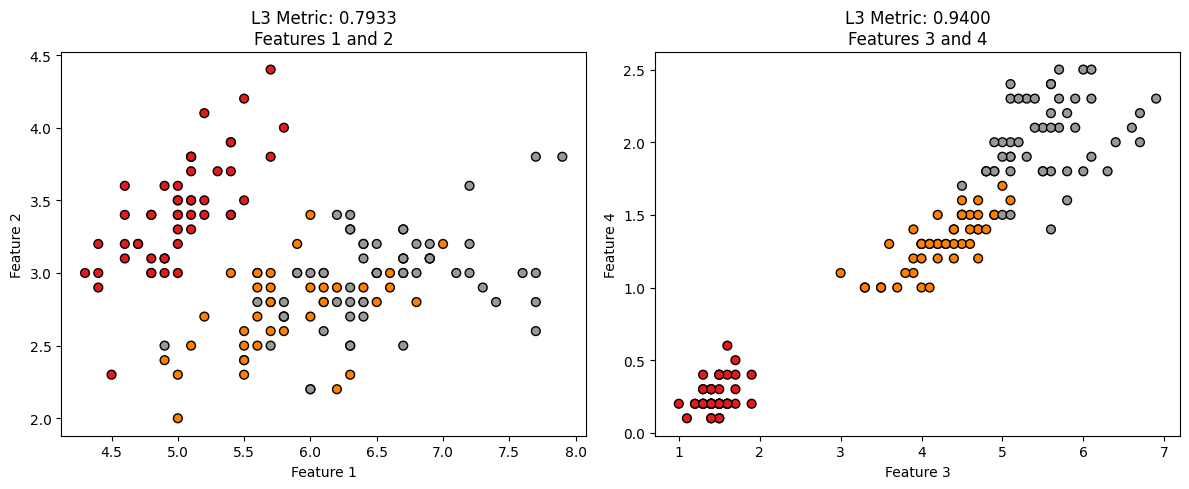

In [4]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Combine features and labels into a single array
data = np.column_stack((X, y))

# Function to calculate L3 metric
def calculate_l3_metric(data, num_pairs=50):
    np.random.seed(42)

    # Randomly select pairs of points from the same class
    selected_pairs = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        selected_pairs.extend(np.random.choice(class_indices, size=(num_pairs, 2), replace=True))

    # Interpolate between selected pairs to create a synthetic test set
    synthetic_test_set = np.zeros_like(data)
    for i, (idx1, idx2) in enumerate(selected_pairs):
        weight = np.random.uniform(0, 1)
        synthetic_test_set[i, :-1] = weight * data[idx1, :-1] + (1 - weight) * data[idx2, :-1]
        synthetic_test_set[i, -1] = data[idx1, -1]

    # Split the dataset into training and synthetic test sets
    X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

    # Train a linear support vector classifier on the training set
    svc = LinearSVC()
    svc.fit(X_train, y_train)

    # Evaluate the error rate on the synthetic test set
    predictions = svc.predict(synthetic_test_set[:, :-1])
    error_rate = accuracy_score(synthetic_test_set[:, -1], predictions)

    return error_rate

# Calculate L3 metric for two different feature subsets
l3_metric_1 = calculate_l3_metric(data[:, [0, 1, -1]])
l3_metric_2 = calculate_l3_metric(data[:, [2, 3, -1]])

# Visualize the dataset in two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
ax = axes[0]
ax.scatter(data[:, 0], data[:, 1], c=data[:, -1], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'L3 Metric: {l3_metric_1:.4f}\nFeatures 1 and 2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Second subplot
ax = axes[1]
ax.scatter(data[:, 2], data[:, 3], c=data[:, -1], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'L3 Metric: {l3_metric_2:.4f}\nFeatures 3 and 4')
ax.set_xlabel('Feature 3')
ax.set_ylabel('Feature 4')

plt.tight_layout()
plt.show()

**3.2 Nonlineality of 1 nearest neighbor classifier (noted as N4)**

It is calculated in a similar way than $L_3$, but considers as classifier the 1 nearest neighbor. The domain of $N_4$ metric is in the range [0, 1]. Low values of $N_4$ indicates that the data set is linearly separable.

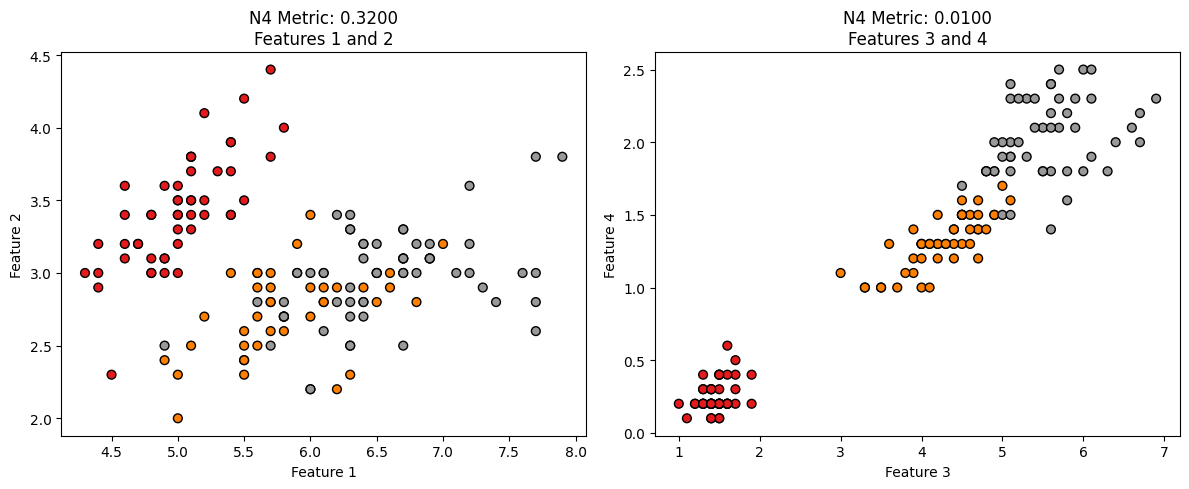

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Combine features and labels into a single array
data = np.column_stack((X, y))

# Function to calculate N4 metric
def calculate_n4_metric(data, num_pairs=50):
    np.random.seed(42)

    # Randomly select pairs of points from the same class
    selected_pairs = []
    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        selected_pairs.extend(np.random.choice(class_indices, size=(num_pairs, 2), replace=True))

    # Interpolate between selected pairs to create a synthetic test set
    synthetic_test_set = np.zeros_like(data)
    for i, (idx1, idx2) in enumerate(selected_pairs):
        weight = np.random.uniform(0, 1)
        synthetic_test_set[i, :-1] = weight * data[idx1, :-1] + (1 - weight) * data[idx2, :-1]
        synthetic_test_set[i, -1] = data[idx1, -1]

    # Split the dataset into training and synthetic test sets
    X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

    # Train a k-nearest neighbors classifier with k=1 on the training set
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    # Evaluate the error rate on the synthetic test set
    predictions = knn.predict(synthetic_test_set[:, :-1])
    error_rate = 1 - accuracy_score(synthetic_test_set[:, -1], predictions)

    # Normalize the error rate to the range [0, 1]
    n4_metric = error_rate / (1 - 1 / len(np.unique(y)))

    return n4_metric

# Calculate N4 metric for two different feature subsets
n4_metric_1 = calculate_n4_metric(data[:, [0, 1, -1]])
n4_metric_2 = calculate_n4_metric(data[:, [2, 3, -1]])

# Visualize the dataset in two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
ax = axes[0]
ax.scatter(data[:, 0], data[:, 1], c=data[:, -1], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'N4 Metric: {n4_metric_1:.4f}\nFeatures 1 and 2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Second subplot
ax = axes[1]
ax.scatter(data[:, 2], data[:, 3], c=data[:, -1], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title(f'N4 Metric: {n4_metric_2:.4f}\nFeatures 3 and 4')
ax.set_xlabel('Feature 3')
ax.set_ylabel('Feature 4')

plt.tight_layout()
plt.show()


**3.3 Fraction of points with associated adherence subsets retained (noted as T1)**

$T_1$ describes the shapes of class manifolds with the notion of adherence subset. An adherence subset can be considered as a sphere centered on an example of the data set which is grown till touching any example of another class. Each adherence subset contains a set of examples of the same class and cannot grow including examples of other classes. The measure removes all adherence subsets included in others, considering only the biggest ones. $T_1$ counts the number of biggest adherence subsets needed to cover each class, where each ball is centered at a training point and grown to the maximal size before it touches another class. It is normalized by the total number of points.

In [21]:
import copy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


# Hostility measure algorithm
def hostility_measure(sigma, X, y, delta, k_min, seed=0):
    """
    :param sigma: proportion of grouped points per cluster. This parameter automatically determines the number of clusters k in every layer.
    :param X: instances
    :param y: labels
    :param delta: the probability threshold to obtain hostility per class and for the dataset
    :param k_min: the minimum number of clusters allowed (stopping condition)
    :param seed: for the k-means algorithm
    :return: host_instance_by_layer - df with hostility instance values per layer (cols are number of clusters per layer, rows are points)
             data_clusters - original data and the cluster to which every original point belongs to at any layer
             results - dataframe (rows are number of clusters per layer) with hostility per class, per dataset and overlap per class
             k_auto - automatic recommended value of clusters k for selecting the best layer to stop
    """

    np.random.seed(seed)

    n = len(X)
    n_classes = len(np.unique(y))
    X_aux = copy.deepcopy(X)

    host_instance_by_layer = []

    # first k:
    k = int(n / sigma)
    # The minimum k is the number of classes
    minimo_k = max(n_classes, k_min)
    if k < minimo_k:
        raise ValueError("sigma too low, choose a higher value")
    else:  # total list of k values
        k_list = [k]
        while (int(k / sigma) > minimo_k):
            k = int(k / sigma)
            k_list.append(k)

        # list of classes
        list_classes = list(np.unique(y))  # to save results with the name of the class
        name2 = 'Overlap_'
        name3 = 'Host_'
        col2 = []
        col3 = []
        for t in range(n_classes):
            col2.append(name2 + str(list_classes[t]))
            col3.append(name3 + str(list_classes[t]))

        columns_v = list(col2) + list(col3) + list(['Dataset_Host'])

        # Results is a dataset to save hostility per class, hostility of the dataset and overlap per class in every layer
        index = k_list
        results = pd.DataFrame(0, columns=columns_v, index=index)

        data_clusters = pd.DataFrame(X)  # to save to which cluster every original point belongs to at any layer
        prob_bomb = np.zeros(len(X))  # to save the probability, for every original point, of its class in its cluster

        h = 1  # to identify the layer
        for k in k_list:

            kmeds = KMeans(n_clusters=min(k, 3), n_init=15, random_state=seed).fit(X_aux)
            labels_bomb1 = kmeds.labels_
            # num_clusters_new = len(np.unique(labels_bomb1))

            col_now = 'cluster_' + str(h) # for the data_clusters dataframe

            if len(y) == len(labels_bomb1):  # only first k-means
                data_clusters[col_now] = labels_bomb1
                # Probability of being correctly identified derived from first k-means
                table_percen = pd.crosstab(y, labels_bomb1, normalize='columns')
                table_percen_df = pd.DataFrame(table_percen)
                prob_bomb1 = np.zeros(len(X))
                for i in np.unique(labels_bomb1):
                    for t in list_classes:
                        prob_bomb1[((y == t) & (labels_bomb1 == i))] = table_percen_df.loc[t, i]

            else:  # all except first k-means (which points are in new clusters)
                data2 = pd.DataFrame(X_aux)
                data2[col_now] = labels_bomb1
                data_clusters[col_now] = np.zeros(n)

                for j in range(k):
                    values_together = data2.index[data2[col_now] == j].tolist()
                    data_clusters.loc[data_clusters[col_old].isin(values_together), col_now] = j

                # Proportion of each class in each cluster of the current partition
                table_percen = pd.crosstab(y, data_clusters[col_now], normalize='columns')
                table_percen_df = pd.DataFrame(table_percen)
                prob_bomb1 = np.zeros(len(X))
                for i in np.unique(labels_bomb1):
                    for t in list_classes:
                        prob_bomb1[((y == t) & (data_clusters[col_now] == i))] = table_percen_df.loc[t, i]

            # For all cases
            prob_bomb += prob_bomb1
            # Mean of the probabilities
            prob_bomb_mean = prob_bomb / h
            h += 1  # to count current layer
            col_old = col_now

            #### Data preparation for next iterations
            # New points: medoids of previous partition
            X_aux = kmeds.cluster_centers_

            ## Hostility instance values in current layer
            host_instance = 1 - prob_bomb_mean

            bin_host = np.where(host_instance > 0, 1, 0)  # it refers to overlap
            bin_hi_classes = np.zeros(n_classes)
            # lost points
            host_vector_delta = np.where(host_instance >= delta, 1, 0) # hostility instance values binarized with delta
            host_dataset = np.mean(host_vector_delta) # hostility of the dataset
            host_classes = np.zeros(n_classes)
            # hostility and overlap of the classes
            for l in range(n_classes):
                ly = list_classes[l]
                bin_hi_classes[l] = np.mean(bin_host[y == ly])
                host_classes[l] = np.mean(host_vector_delta[y == ly])

            # Save results from all layers
            host_instance_by_layer.append(host_instance)
            results.loc[k] = bin_hi_classes.tolist() + host_classes.tolist() + [host_dataset]

        ## Automatic selection of layer
        results_aux = results.loc[:, results.columns.str.startswith('Host')]
        change_max = results_aux.iloc[0, :] * 1.25
        change_min = results_aux.iloc[0, :] * 0.75
        matching = results_aux[(results_aux <= change_max) & (results_aux >= change_min)]
        matching.dropna(inplace=True)  # values not matching appear with NaN, they are eliminated
        k_auto = matching.index[-1] # k value from last layer matching the condition of variability

    host_instance_by_layer = np.vstack(host_instance_by_layer)
    host_instance_by_layer_df = pd.DataFrame(host_instance_by_layer.T, columns=results.index)
    return host_instance_by_layer_df, data_clusters, results, k_auto

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert labels to integers
le = LabelEncoder()
y = le.fit_transform(y)

# Parameters for hostility_measure function
sigma = 5
delta = 0.5
seed = 0
k_min = 3

# Apply hostility_measure algorithm on Iris dataset
host_instance, data_clusters, results, k_auto = hostility_measure(sigma, X, y, delta, k_min, seed)

# Display the results
print("Hostility Instance by Layer:")
print(host_instance)
print("\nData Clusters:")
print(data_clusters)
print("\nResults:")
print(results)
print("\nAutomatic Selected Number of Clusters (k_auto):", k_auto)


Hostility Instance by Layer:
           30        6 
0    0.000000  0.000000
1    0.000000  0.000000
2    0.000000  0.000000
3    0.000000  0.000000
4    0.000000  0.000000
..        ...       ...
145  0.052632  0.052632
146  0.774194  0.774194
147  0.052632  0.052632
148  0.052632  0.052632
149  0.774194  0.774194

[150 rows x 2 columns]

Data Clusters:
       0    1    2    3  cluster_1  cluster_2
0    5.1  3.5  1.4  0.2          1        1.0
1    4.9  3.0  1.4  0.2          1        1.0
2    4.7  3.2  1.3  0.2          1        1.0
3    4.6  3.1  1.5  0.2          1        1.0
4    5.0  3.6  1.4  0.2          1        1.0
..   ...  ...  ...  ...        ...        ...
145  6.7  3.0  5.2  2.3          2        2.0
146  6.3  2.5  5.0  1.9          0        0.0
147  6.5  3.0  5.2  2.0          2        2.0
148  6.2  3.4  5.4  2.3          2        2.0
149  5.9  3.0  5.1  1.8          0        0.0

[150 rows x 6 columns]

Results:
    Overlap_0  Overlap_1  Overlap_2  Host_0  Host_1  Host

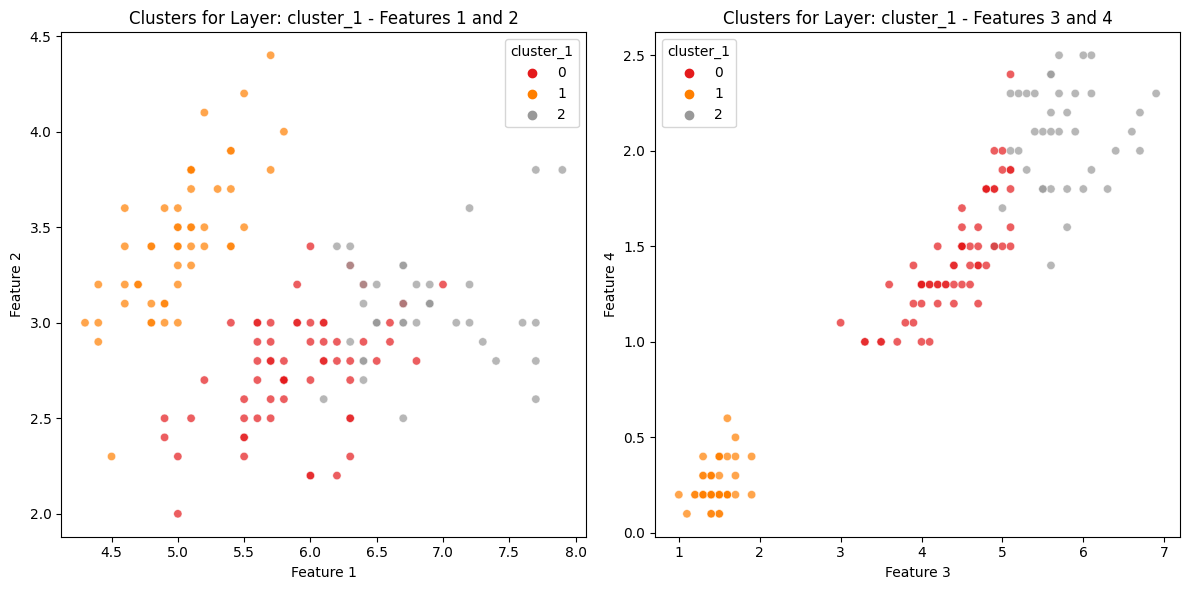

In [36]:
import seaborn as sns
def plot_clusters_dual(data_clusters, feature_cols, cluster_col):
    plt.figure(figsize=(12, 6))

    # Plot for features 1 and 2
    plt.subplot(1, 2, 1)
    plt.title(f'Clusters for Layer: {cluster_col} - Features 1 and 2')
    sns.scatterplot(x=data_clusters.iloc[:, 0], y=data_clusters.iloc[:, 1], hue=data_clusters[cluster_col], palette=plt.cm.Set1, legend='full', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot for features 3 and 4
    plt.subplot(1, 2, 2)
    plt.title(f'Clusters for Layer: {cluster_col} - Features 3 and 4')
    sns.scatterplot(x=data_clusters.iloc[:, 2], y=data_clusters.iloc[:, 3], hue=data_clusters[cluster_col], palette=plt.cm.Set1, legend='full', alpha=0.7)
    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')

    plt.tight_layout()
    plt.show()

# Choose a valid cluster column (up to 3 clusters)
plot_clusters_dual(data_clusters, ['feature_1', 'feature_2', 'feature_3', 'feature_4'], "cluster_1")
